In [2]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [4]:
import glob
from ercollect import molecule as mol
from ercollect.molecule import molecule
from ercollect import rxn_syst
from ercollect.rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [5]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

### collect a random subset of X reactions

In [13]:
no_ = 10
rs_to_test = []
no_rxns_in_total = len(glob.glob(rs_dir+"*sRS*.gpkl"))
idx = np.random.randint(no_rxns_in_total, size=no_) # + 10000

In [14]:
generator = rxn_syst.yield_rxn_syst(output_dir=rs_dir)

In [15]:
smiles_list = []
n_list = []
for i, rs in enumerate(generator):
    if i not in idx:
        continue
    print('index:', i)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
#     try:
#         print('reversible?', rs.reversible)
#     except AttributeError:
#         print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
        try:
            print(rs.skip_reason)
        except AttributeError:
            pass
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
                print('CHEBI ID:', m.chebiID)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
                print('RDKIT logP:', m.logP)
                print('RDKIT Synthetic accessibility:', m.Synth_score)   
                print('size:', m.mid_diam, 'angstrom')
        print('----------------------------------------------')
        print('change in complexity:', rs.delta_comp)
        print('change in synthetic accessibility:', rs.delta_sa)
        # check sequence properties
        print('----------------------------------------------')
        try:
            if rs.sequence is not None:
                print(rs.sequence)
                try:
                    print('uniprotID:', rs.UniprotID)
                except AttributeError:
                    pass
                print('add other sequence IDs for other DBs')
                print('sequence length:', len(rs.sequence))
                print('pI:', rs.pI)
                print('GRAVY:', rs.GRAVY)
                print('A index:', rs.A_index)
                print('I index:', rs.I_index)
                print('TM index:', rs.TM_index)
        except AttributeError:
            pass
    input('done?')
    clear_output()

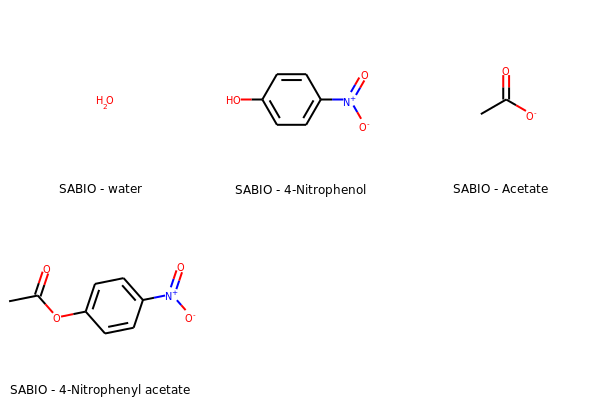

In [21]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)


## Visualize a specific reaction system
- includes search functions

In [1]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst

In [2]:
directory = '/home/atarzia/psp/screening_results/'
# directory += 'new_reactions_kegg_atlas/'
directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [31]:
# get a list of RS with max_comp_size < XX and sequence != None
XX = 6.5
for rs in yield_rxn_syst(output_dir=directory):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size < XX:
        try:
            if rs.sequence is not None:
                print(rs.pkl, rs.TM_index, rs.A_index)
        except AttributeError:
            pass

sRS-3_11_1_1-SABIO-1872.gpkl 0.5103111381623928 87.49999999999999
sRS-3_11_1_1-SABIO-1880.gpkl 0.5103111381623928 87.49999999999999
sRS-3_11_1_1-SABIO-39379.gpkl 0.5103111381623928 87.49999999999999
sRS-3_11_1_1-SABIO-44449.gpkl 0.5103111381623928 87.49999999999999
sRS-3_13_1_5-SABIO-58851.gpkl 1.323067476784663 92.15686274509804
sRS-3_13_1_5-SABIO-58855.gpkl 1.323067476784663 92.15686274509804
sRS-3_13_1_5-SABIO-58856.gpkl 1.5100058437062798 92.20588235294116
sRS-3_1_1_1-SABIO-24741.gpkl 2.42699942909529 91.11969111969111
sRS-3_1_1_1-SABIO-24742.gpkl 1.2539340894715985 79.37984496124031
sRS-3_1_1_1-SABIO-24743.gpkl 2.42699942909529 91.11969111969111
sRS-3_1_1_1-SABIO-24744.gpkl 1.2539340894715985 79.37984496124031
sRS-3_1_1_1-SABIO-24745.gpkl 2.42699942909529 91.11969111969111
sRS-3_1_1_1-SABIO-24746.gpkl 1.2539340894715985 79.37984496124031
sRS-3_1_1_1-SABIO-24754.gpkl 2.42699942909529 91.11969111969111
sRS-3_1_1_1-SABIO-24755.gpkl 2.42699942909529 91.11969111969111
sRS-3_1_1_1-SABIO

In [3]:
pkl_name = 'sRS-3_1_21_3-SABIO-428.gpkl'

In [4]:
rs = get_RS(directory+pkl_name, output_dir=directory, verbose=True)

you have not collected all reaction systems.
Exitting.


SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [34]:
rs.__dict__

{'A_index': 91.11969111969111,
 'DB': 'SABIO',
 'DB_ID': 24741,
 'EC': '3.1.1.1',
 'GRAVY': -0.34942084942084967,
 'I_index': 44.696138996138984,
 'TM_index': 2.42699942909529,
 'UniprotID': 'Q8KT44',
 'all_fit': False,
 'components': [<molecule.molecule at 0x7f16fbc0bb70>,
 'delta_comp': -80.0,
 'delta_sa': -2.802811568916635,
 'etype': 'wildtype isoenzyme EstC',
 'max_XlogP': 1.9,
 'max_comp_size': 6.256,
 'max_logP': 1.5200999999999998,
 'min_XlogP': -0.2,
 'min_logP': -1.2438,
 'mol_collected': True,
 'organism': 'Lactobacillus casei',
 'pI': 5.98309326171875,
 'p_max_comp': 123.0,
 'p_max_sa': 3.065665354160288,
 'pkl': 'sRS-3_1_1_1-SABIO-24741.gpkl',
 'rID': '8104',
 'r_max_comp': 203.0,
 'r_max_sa': 5.868476923076923,
 'req_mod': None,
 'seed_MOF': None,
 'sequence': 'MSEYITVKDGTRISYDVHGEGSPILLIHGVTDCKETYDTDLPFLTKNHRVYRYDLRGHGASDHPKHPFTLENHIEDALAVISKLNLHNFVLYGGSLGSYIAEAVATKIPQDLSGLILNVSAAHNPASALADTAKNDNIPLDKVERRDYWIRHLTIDKGNIKQLTDSGFQKNSLSPEDEDRALRSITAFDFRNELPKITCPTLITSGLYDPVNGP

Acetate 4.5 -1.2438 product 3.065665354160288 31
water 2.586 -0.8247 reactant 5.868476923076923 0
4-Nitrophenol 6.069 1.3003999999999998 product 1.6118539820601292 123
4-Nitrophenyl acetate 6.256 1.5200999999999998 reactant 1.6634133763824526 203


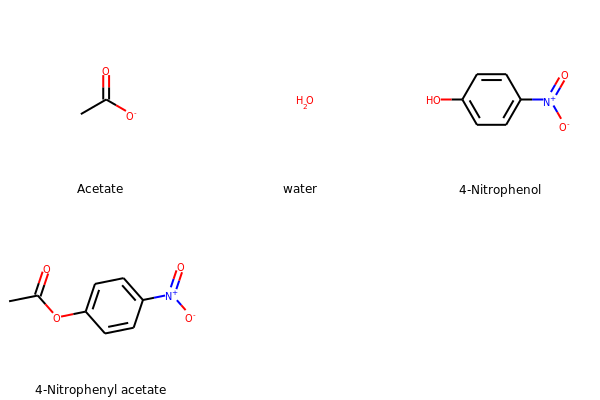

In [36]:
smiles_list = []
n_list = []
for m in rs.components:
    print(m.name, m.mid_diam, m.logP, m.role, m.Synth_score, m.complexity)
    n_list.append(m.name)
    smiles_list.append(m.SMILES)
    MOL = Chem.MolFromSmiles(m.SMILES)
#     Draw.MolToFile(MOL, fileName=m.name+'.svg')
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)